In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# 데이터 Load
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [48]:
# train_df

In [49]:
# X,y 분리
X = train_df.drop(columns=["ID", "label"])
y = train_df["label"]
X_test = test_df.drop(columns=["ID"])

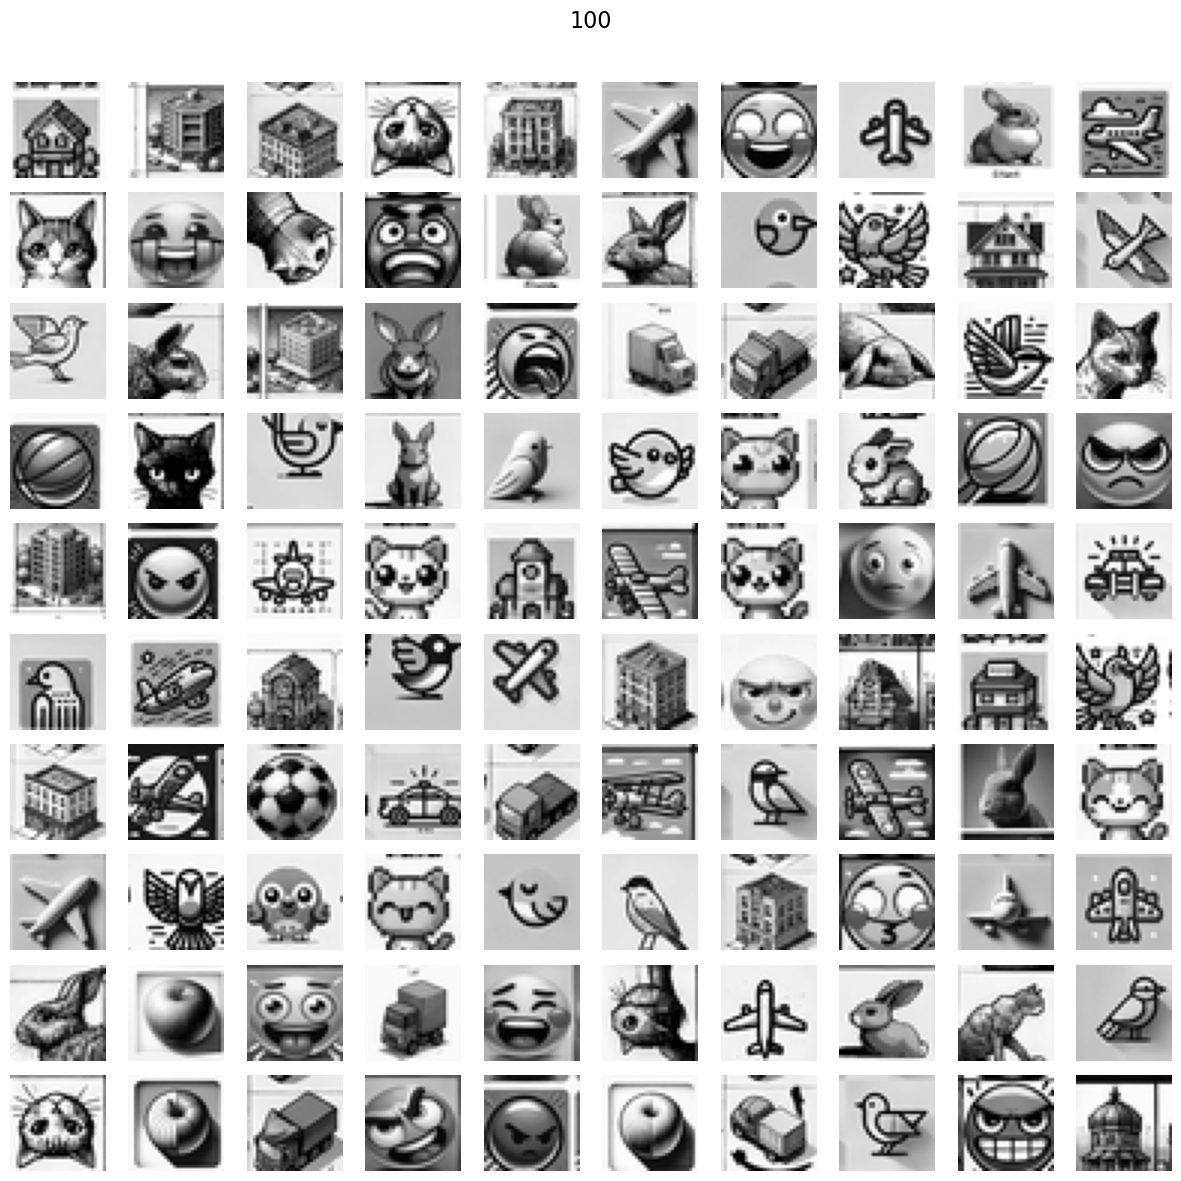

In [50]:
# 사진 100개 한번에
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("100", fontsize=16)

for i, ax in enumerate(axes.flat):
    image = X.iloc[i].values.reshape(32, 32)

    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [51]:
# 전처리, 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y, 들어있는 label값들이 불균형할때 사용

In [52]:
'''
# 하이퍼파라미터 실험용 준비
param_dist = {
    'n_estimators': [100, 200, 300, 500], # 트리 개수, 많으면 안정적이지만, 속도 느려짐, 너무 적으면 성능부족, 너무 많으면 과적합/느림, 100이 기본
    'max_depth': [None, 10, 20, 30, 50], # 트리 최대 깊이, 크게하면 복잡한 패턴 학습 가능/과적합, None 제한없는 깊이이
    'min_samples_split': [2, 5, 10], # 노드분할 최소 샘플 수, 2=기본값/매우세세하게분할
    'min_samples_leaf': [1, 2, 4], # 리프 노드 최소 샘플 수, 리프 노드에 있어야 할 최소 샘플 수, 1=기본값/과적합 가능성
    'max_features': ['sqrt', 'log2', None], #트리노드에 사용할 feature의 수, 너무많은 feature를 사용하면 성눙저하
    'bootstrap': [True, False] # Train 데이터를 학습할때 중복여부, True는 중복허용
}

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,         # 총 30개 조합 무작위로 실험
    cv=3,              # 교차검증 3-fold
    verbose=1,         # 진행 상황 출력
    random_state=42,
    n_jobs=-1          # 가능한 모든 CPU 코어 사용
)
# 하이퍼파라미터 찾기 시작
rf_random.fit(X_train, y_train)
# 하이퍼파라미터 맞는거 출력
print("Best Hyperparameters:", rf_random.best_params_)
'''

'\n# 하이퍼파라미터 실험용 준비\nparam_dist = {\n    \'n_estimators\': [100, 200, 300, 500], # 트리 개수, 많으면 안정적이지만, 속도 느려짐, 너무 적으면 성능부족, 너무 많으면 과적합/느림, 100이 기본\n    \'max_depth\': [None, 10, 20, 30, 50], # 트리 최대 깊이, 크게하면 복잡한 패턴 학습 가능/과적합, None 제한없는 깊이이\n    \'min_samples_split\': [2, 5, 10], # 노드분할 최소 샘플 수, 2=기본값/매우세세하게분할\n    \'min_samples_leaf\': [1, 2, 4], # 리프 노드 최소 샘플 수, 리프 노드에 있어야 할 최소 샘플 수, 1=기본값/과적합 가능성\n    \'max_features\': [\'sqrt\', \'log2\', None], #트리노드에 사용할 feature의 수, 너무많은 feature를 사용하면 성눙저하\n    \'bootstrap\': [True, False] # Train 데이터를 학습할때 중복여부, True는 중복허용\n}\n\n# RandomizedSearchCV\nrf_random = RandomizedSearchCV(\n    estimator=RandomForestClassifier(random_state=42),\n    param_distributions=param_dist,\n    n_iter=30,         # 총 30개 조합 무작위로 실험\n    cv=3,              # 교차검증 3-fold\n    verbose=1,         # 진행 상황 출력\n    random_state=42,\n    n_jobs=-1          # 가능한 모든 CPU 코어 사용\n)\n# 하이퍼파라미터 찾기 시작\nrf_random.fit(X_train, y_train)\n# 하이퍼파라미터 맞는거 출력\nprint("Best Hyperparameter

In [53]:
# 위에서 찾은 하이퍼파라미터로 모델 정의, 막아놓은 걸로 하이퍼 파라미터 바꿔가면서 확인결과 아래가 제일 좋다는 결과
best_rf = RandomForestClassifier( # best_rf 라는 모델(랜덤포레스트분류기), 특징은 괄호안에 있는것처럼 세팅
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    bootstrap=False,
    random_state=42
)

In [54]:
# 모델 학습
best_rf.fit(X_train, y_train)

# train중에서 valid평가
y_val_pred = best_rf.predict(X_val)
print("Validation Report:\n")
print(classification_report(y_val, y_val_pred))

Validation Report:

              precision    recall  f1-score   support

    airplane       1.00      0.58      0.73        19
       apple       1.00      1.00      1.00        10
        ball       1.00      0.86      0.92         7
        bird       0.76      0.92      0.83        24
    building       0.88      1.00      0.94        22
         cat       0.77      0.94      0.85        18
emotion_face       0.89      0.89      0.89        18
  police_car       1.00      1.00      1.00         4
      rabbit       0.96      0.85      0.90        26
       truck       0.83      0.83      0.83         6

    accuracy                           0.88       154
   macro avg       0.91      0.89      0.89       154
weighted avg       0.89      0.88      0.87       154



In [55]:
# test 데이터로 실행
test_preds = best_rf.predict(X_test_scaled)

# 파일로 저장
submission = pd.DataFrame({
    "ID": test_df["ID"],
    "label": test_preds
})
submission.to_csv("submission.csv", index=False)
print("submission.csv 저장")

submission.csv 저장
